<a href="https://colab.research.google.com/github/KleaKalliri/Computer-Vision/blob/main/Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Otsu optimal threshold

In [ ]:
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

I = sk.data.eagle()
v_I = np.reshape(I,(I.shape[0]*I.shape[1],1))

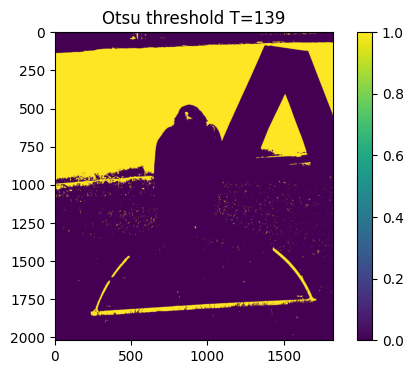

In [ ]:
thresh = threshold_otsu(I)
binary = I > thresh

fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
imgplot = plt.imshow(binary)
plt.title('Otsu threshold T={}'.format(thresh))
plt.colorbar()
plt.show()

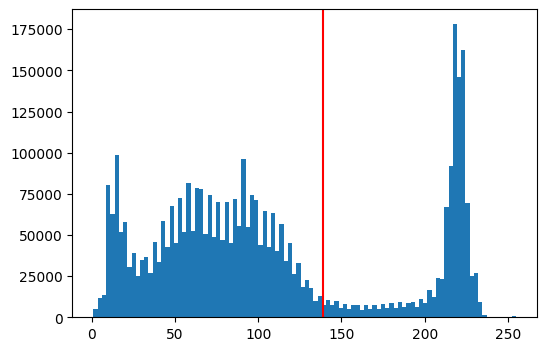

In [ ]:
flat_data = I.flatten()
fig = plt.figure(figsize=(6,4), dpi= 100, facecolor='w', edgecolor='k')
n = plt.hist(flat_data,bins=100,range=[1,flat_data.max()])
plt.axvline(thresh,color='r')
plt.show()

**Comment:** In this case i am encountering misclassification. The eagle, grass, and table share similar pixel intensity values in the grayscale representation of the image. Otsu's method considers only pixel intensity values and does not account for the spatial context or texture of the objects. Since the method operates globally, regions in the image with similar intensities as the eagle (foreground) are also classified as part of the foreground. The table and grass are misclassified because their intensities fall within the same range as the eagle's body.

Task 2

K-means

In [ ]:
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

I = sk.data.coffee()
v_I = np.reshape(I,(I.shape[0]*I.shape[1],I.shape[2]))

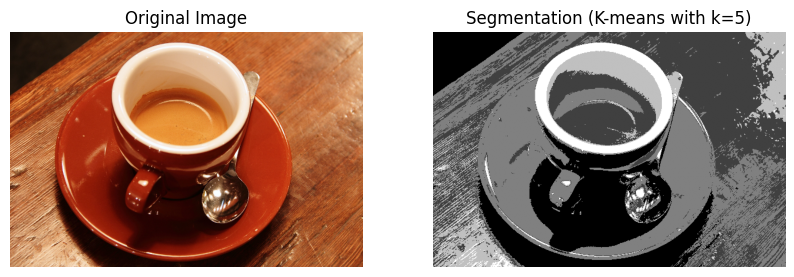

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
import numpy as np

n_clus = 5
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

v_kmeans = kmeans.predict(v_I)
I_kmeans = np.reshape(v_kmeans,(I.shape[0],I.shape[1]))

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()

**Comment:** The method effectively separates regions with significant intensity differences, such as the bright coffee surface and darker parts of the image.The segmentation captured the bright interior of the coffee cup well, as it contrasts significantly with the surrounding dark areas. The wooden table's textured pattern causes it to have varying intensities, leading to some areas of the table being incorrectly classified as part of the coffee cup's cluster. It will give more accurate results if i increase the number of clusters

Task 3

Gaussian Naive Bayes

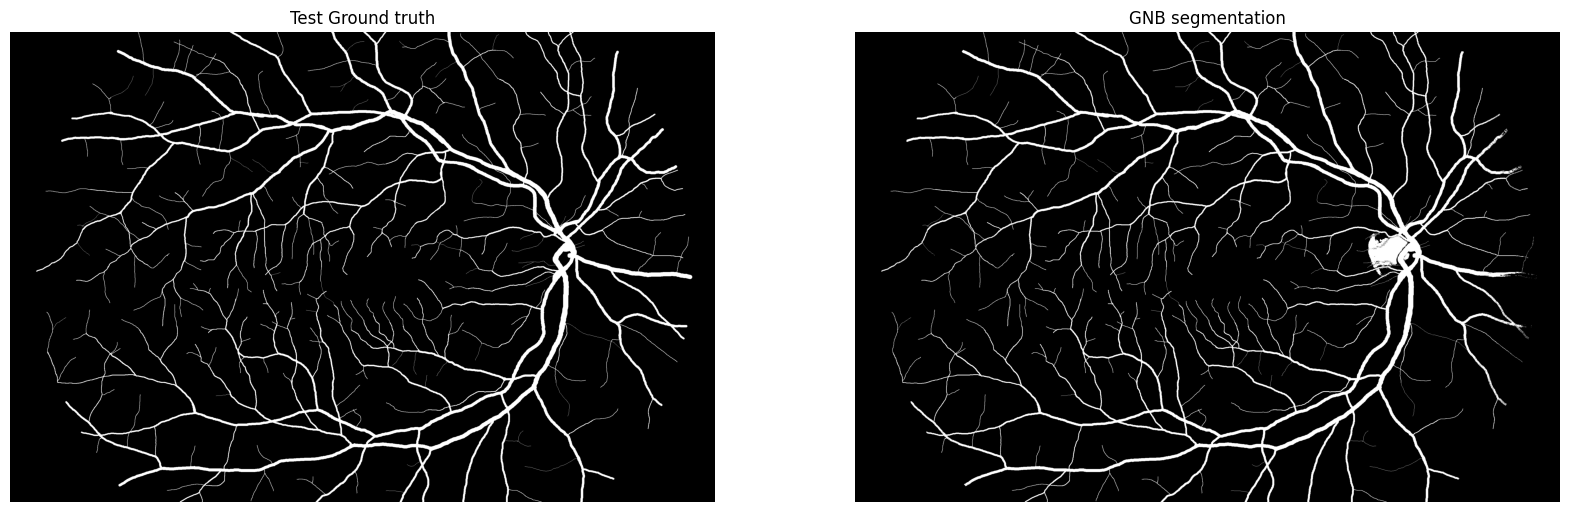

In [ ]:
from sklearn.naive_bayes import GaussianNB
import skimage as sk
import matplotlib.pyplot as plt
from skimage import io
import os
from matplotlib import gridspec

I_train = sk.io.imread('/content/drive/MyDrive/Colab Notebooks/vessels_train.jpg')
I_train_GT = sk.io.imread('/content/drive/MyDrive/Colab Notebooks/vessels_train_GT.tif')
I_test = sk.io.imread('/content/drive/MyDrive/Colab Notebooks/vessels_test.jpg')
I_test_GT = sk.io.imread('/content/drive/MyDrive/Colab Notebooks/vessels_test_GT.tif')

v_train_GT = I_train_GT.reshape(I_train_GT.shape[0]*I_train_GT.shape[1],1).astype(np.bool)
v_I_train = I_train.reshape(I_train.shape[0]*I_train.shape[1],1).astype(np.uint8)
v_I_test = I_test.reshape(I_test.shape[0]*I_test.shape[1],1).astype(np.uint8)

gnb_model = GaussianNB()
gnb_model.fit(v_I_train, v_train_GT.ravel())

v_gnb = gnb_model.predict(v_I_test)
I_gnb = np.array(v_gnb).reshape(I_test.shape[0],I_test.shape[1]).astype(np.uint8)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(20, 20))

ax[0].imshow(I_test_GT, cmap=plt.cm.gray)
ax[0].set_title('Test Ground truth')
ax[0].set_axis_off()

ax[1].imshow(I_gnb, cmap=plt.cm.gray)
ax[1].set_title('GNB segmentation')
ax[1].set_axis_off()

plt.show()

**Comment:** Supervised segmentation relies on ground truth labels for training, ensuring that the segmentation process is guided by the provided labels. The method effectively separates the image into two regions (foreground and background) based on the intensity thresholds derived from the training data.GNB can effectively segment regions because the intensity distributions of the background and the object are separable.

 GNB assumes that the pixel intensities within each class follow a Gaussian distribution. If the actual distribution deviates significantly from Gaussian, the segmentation may be less accurate. Also the lack of spatial awareness limit its applicability for more complex images or those with overlapping intensity distributions.

Task 4

**Supervised segmentation vs Unsupervised segmentation **

Supervised segmentation equires labeled data to train a model while in unsupervised segmentation labeled data is not required,are used clustering algorithms or thresholding. Supervised segmentation uses machine learning or statistical models to assign labels based on features while unsupervised segmentation groups pixels into segments based on similarity in features (e.g intensity, color). In supervised segmentation segments are meaningful and tied to specific labels or objects defined by training data. In unsupervised segmentation segments are arbitrary and based on feature similarity, not specific labels.

**Advantages of supervised segmentation **

Produces accurate segmentation when sufficient and high-quality labeled data is available. Can be trained to focus on specific regions or objects based on the task's requirements. Can incorporate multiple features (e.g., texture, color) to improve segmentation quality.

**Disatvantages of supervised segmentation **

Requires extensive labeled data, which can be expensive and time-consuming to obtain. May overfit to the training data if the model is too complex or the data is insufficient. Training models can be computationally intensive, especially for large datasets.

**Advantages of unsupervised segmentation **

Does not require labeled data, making it easier to apply to large datasets or new images. Algorithms like K-Means or Otsu's thresholding are computationally efficient and easy to implement. Can be applied in scenarios where obtaining labels is impractical.

**Disadvantages of unsupervised segmentation **

Segmentation may not correspond to meaningful or real-world objects. Often relies on simple features like intensity or color, ignoring complex patterns. Requires careful tuning of parameters (e.g number of clusters in K-Means).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte

def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

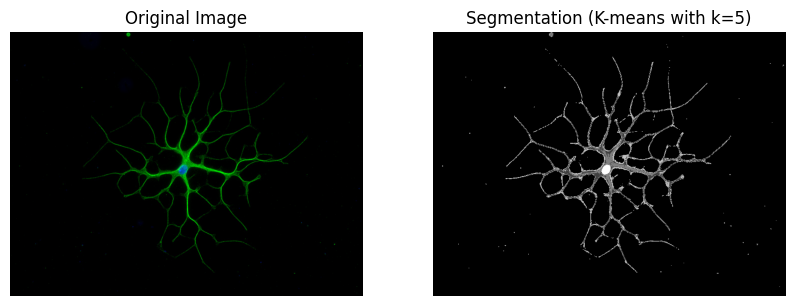

In [ ]:
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

I2 = sk.io.imread('/content/drive/MyDrive/Colab Notebooks/neuron-test.jpg')
v_I2 = np.reshape(I,(I.shape[0]*I.shape[1],I.shape[2]))

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
import numpy as np

n_clus = 5
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)

v_kmeans2 = kmeans.predict(v_I)
I_kmeans2 = np.reshape(v_kmeans,(I.shape[0],I.shape[1]))

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()

In [ ]:
from skimage.color import rgb2gray

v_I_train = I_kmeans.reshape(I_kmeans.shape[0]*I_kmeans.shape[1],1).astype(np.uint8)
I_train_GT = I_kmeans
I_test = sk.io.imread('/content/drive/MyDrive/Colab Notebooks/neuron-test.jpg')
I_test = rgb2gray(I_test)
v_I_test = I_test.reshape(I_test.shape[0]*I_test.shape[1],1).astype(np.uint8)
I_test_GT = I_kmeans2

(366800, 1)

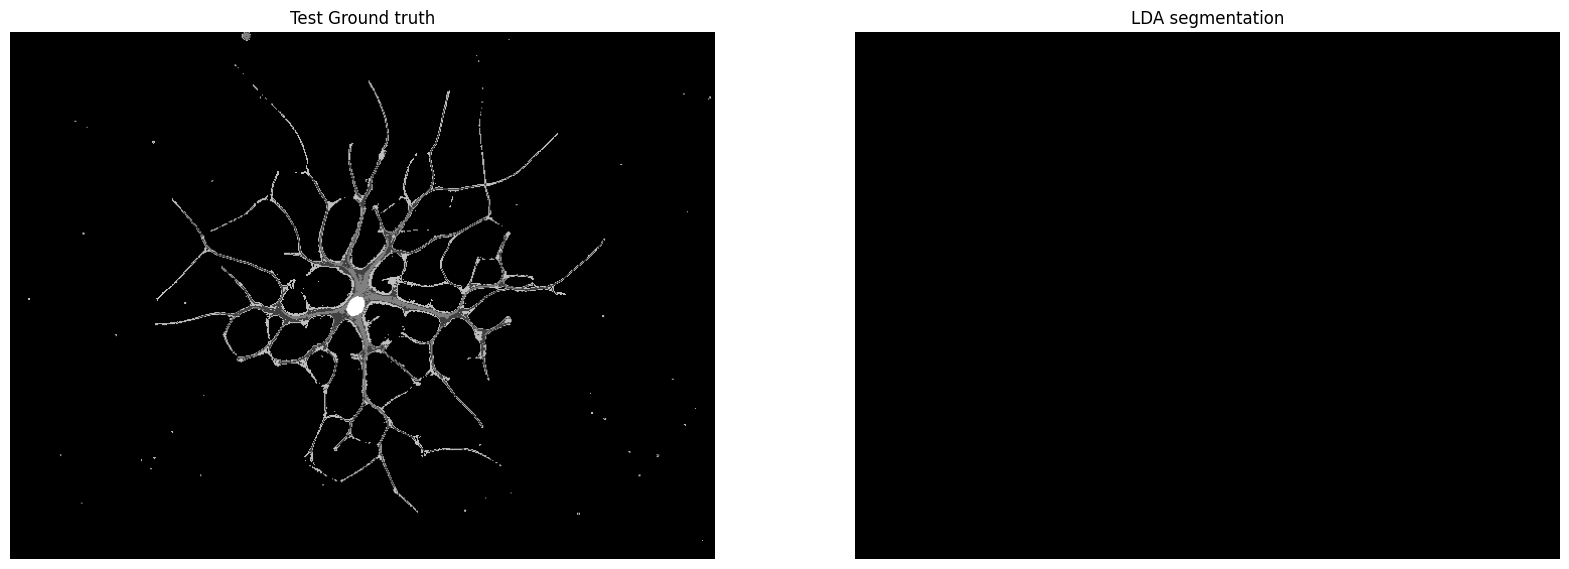

(366800, 1)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

v_train_GT = I_train_GT.reshape(I_train_GT.shape[0]*I_train_GT.shape[1],1).astype(np.bool)

lda_model = LinearDiscriminantAnalysis(store_covariance=True)
lda_model.fit(v_I_train, v_train_GT.ravel())

v_lda = lda_model.predict(v_I_test)
I_lda = np.array(v_lda).reshape(I_test.shape[0],I_test.shape[1]).astype(np.uint8)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(20, 20))

ax[0].imshow(I_test_GT, cmap=plt.cm.gray)
ax[0].set_title('Test Ground truth')
ax[0].set_axis_off()

ax[1].imshow(I_lda, cmap=plt.cm.gray)
ax[1].set_title('LDA segmentation')
ax[1].set_axis_off()

plt.show()

LDA segmentation: ???